# Advanced Applications of Simulation

In this chapter, students will be introduced to some basic and advanced applications of simulation to solve real-world problems. We'll work through a business planning problem, learn about Monte Carlo Integration, Power Analysis with simulation and conclude with a financial portfolio simulation. After completing this chapter, students will be ready to apply simulation to solve everyday problems.

## Modeling Corn Production
Suppose that you manage a small corn farm and are interested in optimizing your costs. In this exercise, we will model the production of corn.

For simplicity, let's assume that corn production depends on only two factors: rain, which you don't control, and cost, which you control. Rain is normally distributed with mean 50 and standard deviation 15. For now, let's fix cost at 5,000. Corn produced in any season is a Poisson random variable while the average corn production is governed by the equation:

$100*(cost)^{0.1}*(rain)^{0.2}$
Let's model this production function and simulate one outcome.

In [1]:
import numpy as np

# Initialize seed and parameters
np.random.seed(223)

# Initialize variables
cost = 5000
rain = np.random.normal(loc=50, scale=15)

# Corn Production Model
def corn_produced(rain, cost):
  mean_corn = 100 * cost**0.1 * rain**0.2
  corn = np.random.poisson(lam=mean_corn)
  return corn

# Simulate and print corn production
corn_result = corn_produced(rain, cost)
print("Simulated Corn Production = {}".format(corn_result))

Simulated Corn Production = 560


## Modeling Profits
In the previous exercise, you built a model of corn production. For a small farm, you typically have no control over the price or demand for corn. Suppose that price is normally distributed with mean 40 and standard deviation 10. You are given a function corn_demanded(), which takes the price and determines the demand for corn. This is reasonable because demand is usually determined by the market and is not in your control.

In this exercise, you will work on a function to calculate the profit by pulling together all the other simulated variables. The only input to this function will be the cost. Upon completion, you will have a function that will give you one simulated profit outcome for a given cost. This function can then be used for planning your costs.

In [2]:
cost = 5000

# This is a guess
def corn_demanded(price):
    return 984 - 23 * price

# Function to calculate profits
def profits(cost):
    rain = np.random.normal(50, 15)
    price = np.random.normal(40, 10)
    supply = corn_produced(rain, cost)
    demand = corn_demanded(price) ## we were not provided this
    equil_short = supply <= demand
    if equil_short ==True:
        tmp = price * supply - cost
        return tmp
    else: 
        tmp2 = price * demand - cost
        return tmp2
result = profits(cost)
print("Simulated profit = {}".format(result))

Simulated profit = -6016.137569855903


## Optimizing Costs
Now we will use the functions you've built to optimize our cost of production. We are interested in maximizing average profits. However, our profits depend on a number of factors, but we only control cost. Thus, we can simulate the uncertainty in the other factors and vary cost to see how our profits are impacted.

Since you manage the small corn farm, you have the ability to choose your cost - from $100 to $5,000. You want to choose the cost that gives you the maximum average profit. In this exercise, we will simulate multiple outcomes for each cost level and calculate an average. We will then choose the cost that gives us the maximum mean profit. Upon completion, you will have a framework for selecting optimal inputs for business decisions.

In [3]:
# Initialize results and cost_levels variables
sims, results = 1000, {}
cost_levels = np.arange(100, 5100, 100)

# For each cost level, simulate profits and store mean profit
for cost in cost_levels:
    tmp_profits = []
    for i in range(sims):
        tmp_profits.append(profits(cost))
    results[cost] = np.mean(tmp_profits)
    
# Get the cost that maximizes average profit
cost_max = [x for x in results.keys() if results[x] == max(results.values())][0]
print("Average profit is maximized when cost = {}".format(cost_max))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


Average profit is maximized when cost = 200


## Integrating a Simple Function
This is a simple exercise introducing the concept of Monte Carlo Integration.

Here we will evaluate a simple integral $\int_{0}^{1} x e^x dx$. We know that the exact answer is 1, but simulation will give us an approximate solution, so we can expect an answer close to 1. As we saw in the video, it's a simple process. For a function of a single variable f(x):

1. Get the limits of the x-axis $(x_{min}, x_{max})$ and y-axis $(max(f(x)),min(min(f(x)),0))$.

2. Generate a number of uniformly distributed point in this box.

3. Multiply the area of the box $((max(f(x)−min(f(x))×(x_{max}−x_{min}))$ by the fraction of points that lie below $f(x)$.

Upon completion, you will have a framework for handling definite integrals using Monte Carlo Integration.

In [4]:
# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y = np.random.uniform(min(min(func(x)), 0), max(func(x)), sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(abs(y) < abs(func(x)))/sims
    return result
    
# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x*np.exp(x), xmin = 0, xmax = 1, sims = 50)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 0.99932346090772, Actual Answer = 1


## Calculating the value of pi
Now we work through a classic example - estimating the value of π.

Imagine a square of side 2 with the origin (0,0) as its center and the four corners having coordinates (1,1),(1,−1),(−1,1),(−1,−1). The area of this square is $2×2=4$. Now imagine a circle of radius 1 with its center at the origin fitting perfectly inside this square. The area of the circle will be π×radius2=π.

To estimate π, we randomly sample multiple points in this square & get the fraction of points inside the circle $(x^2+y^2<=1)$. The area of the circle then is 4 times this fraction, which gives us our estimate of π.

After this exercise, you'll have a grasp of how to use simulation for computation.

In [5]:
# Initialize sims and circle_points
sims, circle_points = 10000, 0 

for i in range(sims):
    # Generate the two coordinates of a point
    point = np.random.uniform(-1 , 1, size=2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
        
# Estimate pi as 4 times the avg number of points in the circle.
pi_sim = 4 * circle_points / sims
print("Simulated value of pi = {}".format(pi_sim))

Simulated value of pi = 3.1116


## Power Analysis - Part I
Now we turn to power analysis. You typically want to ensure that any experiment or A/B test you run has at least 80% power. One way to ensure this is to calculate the sample size required to achieve 80% power.

Suppose that you are in charge of a news media website and you are interested in increasing the amount of time users spend on your website. Currently, the time users spend on your website is normally distributed with a mean of 1 minute and a variance of 0.5 minutes. Suppose that you are introducing a feature that loads pages faster and want to know the sample size required to measure a 10% increase in time spent on the website.

In this exercise, we will set up the framework to run one simulation, run a t-test, & calculate the p-value.

In [6]:
from scipy.stats import ttest_ind
np.random.seed(123)


# Initialize effect_size, control_mean, control_sd
effect_size, sample_size, control_mean, control_sd = 0.05, 50, 1, 0.5

# Simulate control_time_spent and treatment_time_spent, assuming equal variance
control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=sample_size)

# Run the t-test and get the p_value
t_stat, p_value = ttest_ind(control_time_spent, treatment_time_spent)
stat_sig = p_value < 0.05
print("P-value: {}, Statistically Significant? {}".format(p_value, stat_sig))

P-value: 0.5766409395002308, Statistically Significant? False


## Power Analysis - Part II
Previously, we simulated one instance of the experiment & generated a p-value. We will now use this framework to calculate statistical power. Power of an experiment is the experiment's ability to detect a difference between treatment & control if the difference really exists. It's good statistical hygiene to strive for 80% power.

For our website, we want to know how many people need to visit each variant, such that we can detect a 10% increase in time spent with 80% power. For this, we start with a small sample (50), simulate multiple instances of this experiment & check power. If 80% power is reached, we stop. If not, we increase the sample size & try again.

In [7]:
## Parameters
sample_size, sims, effect_size = 50, 1000, 0.10

# Keep incrementing sample size by 10 till we reach required power
while 1:
    control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=(sample_size, sims))
    treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=(sample_size, sims))
    t, p = ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/sims
    if power >= 0.80: 
        break
    else: 
        sample_size += 10
print("For 80% power, sample size required = {}".format(sample_size))

For 80% power, sample size required = 360


## Portfolio Simulation - Part I
In the next few exercises, you will calculate the expected returns of a stock portfolio & characterize its uncertainty.

Suppose you have invested $10,000 in your portfolio comprising of multiple stocks. You want to evaluate the portfolio's performance over 10 years. You can tweak your overall expected rate of return and volatility (standard deviation of the rate of return). Assume the rate of return follows a normal distribution.

First, let's write a function that takes the principal (initial investment), number of years, expected rate of return and volatility as inputs and returns the portfolio's total value after 10 years.

Upon completion of this exercise, you will have a function you can call to determine portfolio performance.

In [8]:
# rates is a Normal random variable and has size equal to number of years
def portfolio_return(yrs, avg_return, sd_of_return, principal):
    #np.random.seed(123)
    rates = np.random.normal(loc=avg_return, scale=sd_of_return, size=yrs)
    # Calculate the return at the end of the period
    end_return = principal
    for x in rates:
        end_return = end_return * (1 + x)
    return end_return

result = portfolio_return(yrs = 5, avg_return = 0.07, sd_of_return = 0.15, principal = 1000)
print("Portfolio return after 5 years = {}".format(result))

Portfolio return after 5 years = 1240.4315550419935


## Portfolio Simulation - Part II
Now we will use the simulation function you built to evaluate 10-year returns.

Your stock-heavy portfolio has an initial investment of $10,000, an expected return of 7% and a volatility of 30%. You want to get a 95% confidence interval of what your investment will be worth in 10 years. We will simulate multiple samples of 10-year returns and calculate the confidence intervals on the distribution of returns.

By the end of this exercise, you will have run a complete portfolio simulation.

In [9]:
# Run 1,000 iterations and store the results
sims, rets = 1000, []

for i in range(sims):
    rets.append(portfolio_return(yrs = 10, avg_return = 0.07, 
                                 sd_of_return = 0.3, principal = 10000))

# Calculate the 95% CI
lower_ci = np.percentile(rets, 2.5)
upper_ci = np.percentile(rets, 97.5)
print("95% CI of Returns: Lower = {}, Upper = {}".format(lower_ci, upper_ci))

95% CI of Returns: Lower = 1428.3366969841038, Upper = 79659.45548262724


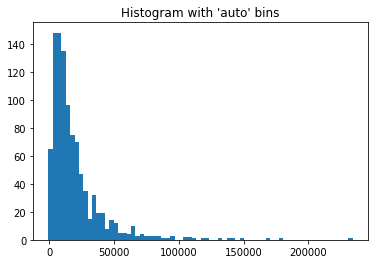

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
_ = plt.hist(rets, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

## Portfolio Simulation - Part III
Previously, we ran a complete simulation to get a distribution for 10-year returns. Now we will use simulation for decision making.

Let's go back to your stock-heavy portfolio with an expected return of 7% and a volatility of 30%. You have the choice of rebalancing your portfolio with some bonds such that the expected return is 4% & volatility is 10%. You have a principal of $10,000. You want to select a strategy based on how much your portfolio will be worth in 10 years. Let's simulate returns for both the portfolios and choose based on the least amount you can expect with 75% probability (25th percentile).

Upon completion, you will know how to use a portfolio simulation for investment decisions.

In [11]:
np.random.seed(123)
rets_stock, rets_bond = [], []

for i in range(sims):
    rets_stock.append(portfolio_return(yrs = 10, avg_return = 0.07, sd_of_return = 0.3, principal = 10000))
    rets_bond.append(portfolio_return(yrs = 10, avg_return = 0.04, sd_of_return = 0.1, principal = 10000))

# Calculate the 25th percentile of the distributions and the amount you'd lose or gain
rets_stock_perc = np.percentile(rets_stock, 25)
rets_bond_perc = np.percentile(rets_bond, 25)
additional_returns = rets_stock_perc - rets_bond_perc
print("Sticking to stocks gets you an additional return of {}".format(additional_returns))

Sticking to stocks gets you an additional return of -5518.530403193416
